In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


## Import the Library

In [20]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import cv2
import os
import numpy as np
from google.colab.patches import cv2_imshow

## Load the model

In [3]:
model = load_model('/content/gdrive/MyDrive/data/model/face_detection_model.h5')
prototxtPath=os.path.sep.join(['/content/gdrive/MyDrive/data/model','deploy.prototxt'])
weightsPath=os.path.sep.join(['/content/gdrive/MyDrive/data/model','res10_300x300_ssd_iter_140000.caffemodel'])

In [4]:
net = cv2.dnn.readNet(prototxtPath, weightsPath)

## Function define for mask detection and labeling the result in image

In [51]:
def mask_detection_and_labeling(detections,image,w,h):
  # loop over the detection
  for i in range(0, detections.shape[2]):
    # store the probability associated with detection
    confidence = detections[0, 0, i, 2]
    # take only that part whose probability of detecting face is greater that 50%
    if confidence > 0.5:
      # x,y coordinates for bounding box for the face
      box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
      (startX, startY, endX, endY) = box.astype("int")
      # ensure bounding box fall within dimension of frame
      (startX, startY) = (max(0, startX), max(0, startY))
      (endX, endY) = (min(w - 1, endX), min(h - 1, endY))
      # extract the face from image
      face = image[startY:endY, startX:endX]
      # convert image from BGR to RGB
      face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
      # Resize the face to (224,224)
      face = cv2.resize(face, (224, 224))
      # convert the face into array of pixels
      face = img_to_array(face)
      # preprocess the face
      face = preprocess_input(face)
      face = np.expand_dims(face, axis=0)
      # pass the face to the model we create for detecting the mask and stoe the probability for each mask and without mask
      (mask, withoutMask) = model.predict(face)[0]
      # predict the label and define the color show with respected label
      if( mask > withoutMask ):
        label = "Mask"
        color = (0,255,0)
      else:
        label = "No Mask"
        color = (0,0,255)
      # store the prediction with the probability of that prediction
      label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)
      #labeling the image with the prediction
      cv2.putText(image, label, (startX, startY - 10),cv2.FONT_HERSHEY_SIMPLEX, 1 , color, 3)
      cv2.rectangle(image, (startX, startY), (endX, endY), color, 2)
  return image


## Function define for face mask detetcion

In [28]:
def face_mask_detetcion(image):
  #convert image into array of pixels
  image = cv2.imread(img)
  orig = image.copy()
  # store the height and weight of image
  (h, w) = image.shape[:2]
  # pass our image to the blobfromImage for image processing like resizing and mean subtraction.
  blob=cv2.dnn.blobFromImage(image,1.0,(299,299),(104.0,177.0,123.0))
  # pass bolob to the network that we define for face detection
  net.setInput(blob)
  detections=net.forward()
  # pass the image, detection result , weight and height of image to the function we define for mask detection and labeling the images
  result = mask_detection_and_labeling(detections,image,w,h)
  return result

## Load the images and pass it to the function fase_mask_detection

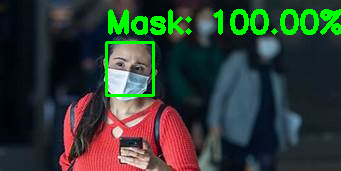

In [74]:
img = "/content/th (1).jpg"
res = face_mask_detetcion(img)
cv2_imshow(res)

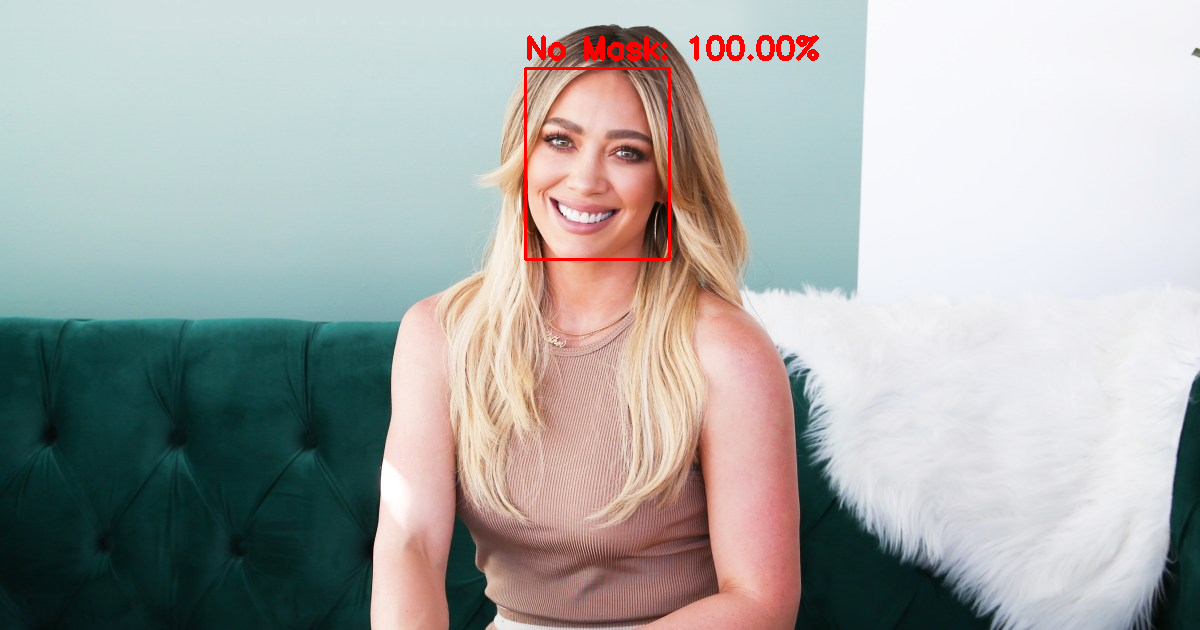

In [78]:
img = "/content/hilary-duff-calls-out-embarrassing-people-not-wearing-masks-on-4th-of-july.jpg"
res = face_mask_detetcion(img)
cv2_imshow(res)